In [15]:
import numpy as np
import pandas as pd

# Introducting Pandas Objects

Fundamental Pandas data structures: `Series`, `DataFrame` and `Index`

## The Pandas Series Object

A `Series` is a one-dimensional array of indexed data

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

: 

It's composed of `values` and `index` attributes. `values` is a NumPy array, the `index` is in array-like of type `pd.Index`

In [ ]:
print(data.index)
print(data.values)
print(data[1:3])

RangeIndex(start=0, stop=4, step=1)
[0.25 0.5  0.75 1.  ]
1    0.50
2    0.75
dtype: float64


: 

: 

: 

: 

`Series` is much more general and flexible than NumPy array

### `Series` as generalized NumPy array

Unlike Numpy, index here are explicitely defined, and we can play with it.

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

: 

: 

: 

: 

### Series as specialized dictionary

More efficient than Python dictionnary because of type checking. 

In [ ]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

: 

: 

: 

: 

When created, the index of the serie is drawn from the sorted keys. \
Unlike a dict, `Series` support array-style operations such as slicing

In [ ]:
population['California':'Illinois':2]

California    38332521
New York      19651127
Illinois      12882135
dtype: int64

: 

: 

: 

: 

### Constructing Series object

Basic way to define a Serie:

```python
pd.Series(data, index=index)
```

In [ ]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

: 

: 

: 

: 

In [ ]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

: 

: 

: 

: 

## The Pandas DataFrame Object

### DataFrame as a generalized NumPy array

If a `Series` is an analog of a one-dimensional array, a `DataFrame` is an analog of a two-dimensional array 

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
states = pd.DataFrame({'population': population,
                       'area': area})
states


,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


: 

: 

: 

: 

Like the `Series`, we can access `index` attribute. Additionally, `DataFrame` also has `columns` attribute.

In [ ]:
print(states.index)
print(states.columns)

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
Index(['population', 'area'], dtype='object')


: 

: 

: 

: 

### DataFrame as a specialized dictionary

In [ ]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

: 

: 

: 

: 

**WARNING**: `states['area']` returns a column, and not a row

### Constructing DataFrame objects

#### From a single Series object

In [ ]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


: 

: 

: 

: 

#### From a list of dicts

In [ ]:
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


: 

: 

: 

: 

if some keys are missing, Panas, will fill them with `NaN`

In [ ]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


: 

: 

: 

: 

#### From a dictionnary of Series objects

In [ ]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


: 

: 

: 

: 

#### From a two-dimensional NumPy array

In [ ]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.905773,0.673224
b,0.365530,0.103996
c,0.063348,0.094756


: 

: 

: 

: 

#### From a NumPy structured array

In [ ]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

: 

: 

: 

: 

In [ ]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


: 

: 

: 

: 

## The Pandas Index Object

This `Index` object is an interesting structure in itself, and it can be thought of either as an immutable array or as an ordered set (technically a multi-set, as `Index` objects may contain repeated values)

In [ ]:
ind = pd.Index([2,3,5,7,11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

: 

: 

: 

: 

### Index as immutable array

In [ ]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

: 

: 

: 

: 

Index objects also have many of the attributes familiar from NumPy arrays:

In [ ]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


: 

: 

: 

: 

We can't modify an `Index`, it is immutable.

### Index as ordered set

Pandas objects are designed to facilitate operations such as joins across datasets, which depend on many aspects of set arithmetic

In [ ]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

: 

: 

: 

: 

In [ ]:
indA.intersection(indB) # intersection
indA.union(indB) # union
indA.symmetric_difference(indB) # symmetric difference

Int64Index([1, 2, 9, 11], dtype='int64')

: 

: 

: 

: 

# Data Indexing and Selection

## Data Selection in Series

It acts as a one-dimensional NumPy array

### Series as dictionary

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

: 

: 

: 

: 

In [ ]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

: 

: 

: 

: 

In [ ]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

: 

: 

: 

: 

In [ ]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

: 

: 

: 

: 

### Series as one-dimensional array

Same mechanisms as NumPy arrays : slices, masking and fancy indexing

In [ ]:
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

: 

: 

: 

: 

In [ ]:
data[0:2] # implicit integer index

a    0.25
b    0.50
dtype: float64

: 

: 

: 

: 

In [ ]:
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

: 

: 

: 

: 

In [ ]:
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

: 

: 

: 

: 

### Indexers: loc, iloc and ix

These slicing and indexing conventions can be a source of confusion. For example, if your `Series` has an explicit integer index, an indexing operation such as `data[1]` will use the explicit indices, while a slicing operation like `data[1:3]` will use the implicit Python-style index.

In [ ]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

: 

: 

: 

: 

In [ ]:
data[1]

'a'

: 

: 

: 

: 

In [ ]:
data[1:3]

3    b
5    c
dtype: object

: 

: 

: 

: 

The `loc` attribute allows indexing and slincing that always references the explicit index

In [ ]:
data.loc[1]

'a'

: 

: 

: 

: 

In [ ]:
data.loc[1:3]

1    a
3    b
dtype: object

: 

: 

: 

: 

The `iloc` attribute allows indexing and slicing that always references the implicit Python-style index

In [ ]:
data.iloc[1]

'b'

: 

: 

: 

: 

In [ ]:
data.iloc[1:3]

3    b
5    c
dtype: object

: 

: 

: 

: 

The thirs `ix` attribute is a hybrid of the two, ans for `Series` object is equivalent to standard `[]`-based indexing. The purpose of `ix` indexer will become more apparent in the context of `DataFrame` objects

## Data Selection in DataFrame

### DataFrame as a dictionary

Let's consider the `DataFrame` as a dictionary of related `Series`

In [ ]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


: 

: 

: 

: 

Individual `Series` that make up the columns can be accessed via dictionary-style indexing, or attribute-style

In [ ]:
data['area']
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

: 

: 

: 

: 

In [ ]:
data.area is data['area']

True

: 

: 

: 

: 

**WARNING**: it won't work for every columns (if conflict with methods for example)

In [ ]:
data.pop is data['pop'] # where pop is also a method

False

: 

: 

: 

: 

With this syntax, we can modify the object

In [ ]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


: 

: 

: 

: 

### DataFrame as two-dimensional array

In [ ]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

: 

: 

: 

: 

Many familiar array-like observations can be done one the `DataFrame` itself

Again, we can use `iloc` and  `loc` for indexing

In [ ]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


: 

: 

: 

: 

In [ ]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


: 

: 

: 

: 

The `loc` method can be combined with masking and fancy indexing

In [ ]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


: 

: 

: 

: 

Indexing also work to modify data

### Additional indexing conventions

When indexing refers to columns, slicing refers to rows

In [ ]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


: 

: 

: 

: 

# Operating on Data in Pandas

## UFuncs: Index Preservation

Let's define a `Series` and a `DataFrame`

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

: 

: 

: 

: 

In [ ]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


: 

: 

: 

: 

When using ufuncs on `Series` and `DataFrame`, indexes are preserved

In [ ]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

: 

: 

: 

: 

In [ ]:
np.exp(df)

,A,B,C,D
0,403.428793,8103.083928,7.389056,403.428793
1,1096.633158,54.598150,20.085537,1096.633158
2,1096.633158,7.389056,148.413159,54.598150


: 

: 

: 

: 

## UFuncs: Index Alignment

In [ ]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

: 

: 

: 

: 

We have `NaN` values because of missing for index `3` (for `A`) and index `0` (for `B`)

In [ ]:
A.index.union(B.index)

Int64Index([0, 1, 2, 3], dtype='int64')

: 

: 

: 

: 

In [ ]:
A.index.intersection(B.index)

Int64Index([1, 2], dtype='int64')

: 

: 

: 

: 

If `NaN` values are not desired, we can fill the empty spaces

In [ ]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

: 

: 

: 

: 

### Index alignment in DataFrame

Similar behaviour on rows and columns

In [ ]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


: 

: 

: 

: 

In [ ]:
B = pd.DataFrame(rng.randint(0,10,(3,3)), columns=list("BAC"))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


: 

: 

: 

: 

In [ ]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


: 

: 

: 

: 

Let's fill empty spaces by the mean of A values

In [ ]:
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


: 

: 

: 

: 

## Ufuncs: Operations Between DataFrame and Series

As with NumPy, arithmetic operations are applied row-wise, but it can be changed using `axis` keyword

In [ ]:
A = rng.randint(10, size=(3,4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

: 

: 

: 

: 

In [ ]:
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

: 

: 

: 

: 

In [ ]:
df = pd.DataFrame(A, columns=list('QRST'))
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


: 

: 

: 

: 

In [ ]:
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


: 

: 

: 

: 

In [ ]:
df.loc[:, ["Q","S","T"]].subtract(df['R'], axis=0)

,Q,S,T
0,-5,-6,-4
1,-4,-2,2
2,5,2,7


: 

: 

: 

: 

# Handling Missing Data

Missing values refer to `null`, `NaN` or `NA` values

## Trade-Offs in Missing Data Conventions

Two options to indicate missing values: `boolean mask` and `sentinel value`

Boolean mast requires allocation of another array, and sentinel value reduces the range of valid values

### `None`: Pythonix missing data

Because `None` is a Python object, it can be used in arrays with data type `object`

In [ ]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

: 

: 

: 

: 

`dtype=object` use Python types, so it's less efficient that NumPy / Pandas ones

In [ ]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
46.1 ms ± 821 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.59 ms ± 27.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



: 

: 

: 

: 

Aggregations likes `sum` or `min` will fail because of missing data

In [ ]:
# vals1.sum()

: 

: 

: 

: 

### `NaN`: Missing numerical data

`NaN` is a specifif floating-point value

In [ ]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

: 

: 

: 

: 

Exception are not raised

In [ ]:
print(vals2.sum())
print(vals2 + 1)
print(1 + np.nan)

nan
[ 2. nan  4.  5.]
nan


: 

: 

: 

: 

We can ignore these specific values

In [ ]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

: 

: 

: 

: 

### NaN and None in Pandas

Pandas is built to handle the two of them nearly interchangeably, between them where appropriate:

In [ ]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

: 

: 

: 

: 

When Pandas find a NaN value, the data structure will be upcast to floating-point type

In [ ]:
x = pd.Series(np.arange(2), dtype=int)
x

0    0
1    1
dtype: int64

: 

: 

: 

: 

In [ ]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

: 

: 

: 

: 

## Operations on Null Values

`isnull()` generates a boolean mask indicating missing values \
`notnull()` does the opposite \
`dropna()` returns a filtered version of the data \
`fillna()` returns a copy with missing values filled or imputed

### Detecting null values

In [ ]:
data = pd.Series([1, np.nan, 'hello', None])
data

0        1
1      NaN
2    hello
3     None
dtype: object

: 

: 

: 

: 

In [ ]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

: 

: 

: 

: 

In [ ]:
data[data.notnull()]

0        1
2    hello
dtype: object

: 

: 

: 

: 

### Dropping null values

In [ ]:
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


: 

: 

: 

: 

We can only drop full rows or full columns

In [ ]:
df.dropna()

,0,1,2,3


: 

: 

: 

: 

In [ ]:
df.dropna(axis=1)

,2
0,2
1,5
2,6


: 

: 

: 

: 

We can also drop rows or columns that contains ONLY `NaN` values

In [ ]:
df.dropna(axis=1, how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


: 

: 

: 

: 

The `thresh` parameter let us specify a minimum number of non-null values for the row/column to be kept:

In [ ]:
df.dropna(axis=0, thresh=2)

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


: 

: 

: 

: 

### Filling null values

In [ ]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

: 

: 

: 

: 

In [ ]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

: 

: 

: 

: 

We can also propagate previous or next values

In [ ]:
print(data.fillna(method="ffill"))
print(data.fillna(method="bfill"))

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64
a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64


: 

: 

: 

: 

On a `DataFrame`, we can also specify the `axis`

In [ ]:
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


: 

: 

: 

: 

# Hierarchical indexing

Even if Pandas has `Panel` and `Panel4D` to handle three-dimensional and four-dimensional arrays, a far more common pattern in practice is to maje use of _hierarchical indexing_. In this way, higher-dimensional data can be compactly represented within the familiar one-dimensional `Series` and two-dimensional `DataFrame` objects.

For this, we will explore the direct creation of `MultiIndex` objects

## A Multiply Indexed Serie

Let's consider how we might represent 2d data within 1d `Series`

### The bad way

In [ ]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

: 

: 

: 

: 

However, we can't select all values from 2010, or we need to do some messy stuff

In [ ]:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

: 

: 

: 

: 

### The Better Way: Pandas MultiIndex 

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

: 

: 

: 

: 

Let's re-index our series

In [ ]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

: 

: 

: 

: 

We can use slicing and fancy indexing on it

In [ ]:
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

: 

: 

: 

: 

### MultiIndex as extra dimension

We could have done the same with `DataFrame`, with cities in rows and years in columns. The `unstack` method will convert a multiply indexed `Series` into a conventionally indexed `DataFrame`

In [ ]:
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


: 

: 

: 

: 

`stack` method provides the opposite operation

In [ ]:
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

: 

: 

: 

: 

It's easy to add new column

In [ ]:
under_18 = np.array([9267089, 9284094, 4687374, 4318033, 5906301, 6879014])
pop_df = pd.DataFrame({'total': pop, 'under18': under_18})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

: 

: 

: 

: 

All the ufuncs work

## Methods of MultiIndex Creation

Straightforward: pass a list of two or more indexed array to the constructor

In [ ]:
df = pd.DataFrame(np.random.rand(4,2),
                index=[['a','a','b','b'],[1,2,1,2]],
                columns=['data1', 'data2'])
df

data1     data2
a 1  0.208805  0.635619
  2  0.705994  0.680089
b 1  0.049951  0.800356
  2  0.406045  0.533697

: 

: 

: 

: 

Also possible to pass a dictionary with appropriate tuples as keys

In [ ]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

: 

: 

: 

: 

### Explicit MultiIndex constructors

In [ ]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

: 

: 

: 

: 

In [ ]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

: 

: 

: 

: 

In [ ]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]]) # cartesian product

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

: 

: 

: 

: 

Any of these objects can be passed as the `index` argument when creating a `Series` or a `DataFrame`

### MultiIndex level names

Sometimes it is easier to give names to the levels of `MultiIndex`

In [ ]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

: 

: 

: 

: 

### MultiIndex for columns

Just as the rows, columns can also have multiple levels of indices.

In [ ]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], names=['year', 'visit'])
columns = pd.MultiIndex.from_product(
    [['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
    names=['subject', 'type']
)

# mock some data
data = np.round(np.random.randn(4,6), 1)
data[:, ::2] *= 10
data += 37

# create DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      22.0  36.9  10.0  38.3  32.0  35.9
     2      39.0  37.0  47.0  36.2  22.0  37.7
2014 1      44.0  37.4  36.0  35.7  39.0  36.9
     2      26.0  37.0  41.0  37.5  43.0  35.0

: 

: 

: 

: 

In [ ]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      10.0  38.3
     2      47.0  36.2
2014 1      36.0  35.7
     2      41.0  37.5

: 

: 

: 

: 

## Indexing and Slicing a MultiIndex

### Multiply indexed Series

In [ ]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

: 

: 

: 

: 

In [ ]:
pop['California', 2000]

33871648

: 

: 

: 

: 

We can also do _partial indexing_, by specifying only one index

In [ ]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

: 

: 

: 

: 

In [ ]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

: 

: 

: 

: 

In [ ]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

: 

: 

: 

: 

In [ ]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

: 

: 

: 

: 

In [ ]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

: 

: 

: 

: 

### Multiply indexed DataFrames

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      22.0  36.9  10.0  38.3  32.0  35.9
     2      39.0  37.0  47.0  36.2  22.0  37.7
2014 1      44.0  37.4  36.0  35.7  39.0  36.9
     2      26.0  37.0  41.0  37.5  43.0  35.0

: 

: 

: 

: 

Columns are primary in a `DataFrame`

In [ ]:
health_data['Guido', 'HR']

year  visit
2013  1        10.0
      2        47.0
2014  1        36.0
      2        41.0
Name: (Guido, HR), dtype: float64

: 

: 

: 

: 

We can also use `loc` and `iloc`

In [ ]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      22.0  36.9
     2      39.0  37.0

: 

: 

: 

: 

In [ ]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        22.0
      2        39.0
2014  1        44.0
      2        26.0
Name: (Bob, HR), dtype: float64

: 

: 

: 

: 

Working with slices within these index tuples is not especially convenient and lead to an error

In [ ]:
# health_data.loc[(:, 1), (:, 'HR')]

: 

: 

: 

: 

Can work by using python builtin `slice()` function, but a better way is to use `IndexSlice`

In [ ]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,22.0,10.0,32.0
2014,1,44.0,36.0,39.0


: 

: 

: 

: 

## Rearranging Multi-Indices

There are many ways to finely control the rearrangement of data, such as `stack()` and `unstack()`

### Sorted and unsorted indices

Many of the `MultiIndex` slicing operations will fail if the index is not sorted.

In [ ]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.799342
      2      0.062639
c     1      0.912973
      2      0.607361
b     1      0.687876
      2      0.004321
dtype: float64

: 

: 

: 

: 

Trying to take a partial slice of this index will result in an error

In [ ]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


: 

: 

: 

: 

The error come from the MultiIndex not beeing sorted. To do so, we can use `sort_index()` or `sortlevel()`

In [ ]:
data = data.sort_index()
data

char  int
a     1      0.799342
      2      0.062639
b     1      0.687876
      2      0.004321
c     1      0.912973
      2      0.607361
dtype: float64

: 

: 

: 

: 

In [ ]:
data['a':'b']

char  int
a     1      0.799342
      2      0.062639
b     1      0.687876
      2      0.004321
dtype: float64

: 

: 

: 

: 

### Stacking and unstacking indices

In [ ]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

: 

: 

: 

: 

In [ ]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


: 

: 

: 

: 

In [ ]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


: 

: 

: 

: 

### Index setting and resetting

Another way to rearrange hierarchical data is to turn index labels into columns

In [ ]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


: 

: 

: 

: 

Often when working with data in the real world, the raw input data looks like this and it's useful to build a `MultiIndex` from the column values. This can be done with the `set_index` method of the DataFrame, which returns a multiply indexed `DataFrame`:

In [ ]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

: 

: 

: 

: 

## Data Aggregations on Multi-Indices

To use aggregations methods, such as `mean` `min` or `max`, we can pass a `level` parameter in a `groupby`

In [ ]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      22.0  36.9  10.0  38.3  32.0  35.9
     2      39.0  37.0  47.0  36.2  22.0  37.7
2014 1      44.0  37.4  36.0  35.7  39.0  36.9
     2      26.0  37.0  41.0  37.5  43.0  35.0

: 

: 

: 

: 

In [ ]:
health_data.groupby(level='year').mean()

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     30.5  36.95  28.5  37.25  27.0  36.80
2014     35.0  37.20  38.5  36.60  41.0  35.95

: 

: 

: 

: 

In [ ]:
health_data.groupby(level='year').mean().groupby(axis=1, level="type").mean()

type,HR,Temp
year,,
2013,28.666667,37.000000
2014,38.166667,36.583333


: 

: 

: 

: 

# Combining Datasets: Concat and Append

For convenience, let's define a function that create a `DataFrame`, and a class to display many

In [ ]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


: 

: 

: 

: 

In [ ]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

: 

: 

: 

: 

## Recall: Concatenation of NumPy Arrays

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

: 

: 

: 

: 

In [ ]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

: 

: 

: 

: 

## Simple Concatenation with `pd.concat`

Similar to `np.concatenate` but with other options

Signature in Pandas v0.18
```python
pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
          keys=None, levels=None, names=None, verify_integrity=False,
          copy=True)
```

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

: 

: 

: 

: 

Also work with higher-dimensional objects

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


: 

: 

: 

: 

By default, concatenation apply on `axis=0`

In [ ]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis=1)")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis=1)
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

: 

: 

: 

: 

### Duplicate indices

Pandas concatenation preserves indices, which is not the case with Numpy. So the result will have duplicate indices


In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index  # make duplicate indices!
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


: 

: 

: 

: 

#### Catching the repeats as an error

We can use `verify_integrity` to check dupplicate indices.

In [ ]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


: 

: 

: 

: 

#### Ignoring the index

In [ ]:
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


: 

: 

: 

: 

#### Adding MultiIndex keys

In [ ]:
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

: 

: 

: 

: 

### Concatenation with joins

By default, the entries for which no data is available are filled with NA values. We can specify `join` parameter.

In [ ]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

: 

: 

: 

: 

Anothe option is to specify the index of the remaining columns using `reindex` method.

In [ ]:
display('df5', 'df6',
        "pd.concat([df5, df6]).reindex(df5.columns)")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6]).reindex(df5.columns)
     A    B    C    D
A  NaN  NaN  NaN  NaN
B  NaN  NaN  NaN  NaN
C  NaN  NaN  NaN  NaN

: 

: 

: 

: 

# Combining Datasets: Merge and Join

## Relational Algebra

Pandas implements several fundamentals in `pd.merge()` function and the related `join()` method of `Series` and `DataFrame`

## Categories of Joins

### One-to-one joins


In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df3 = pd.merge(df1, df2)
display('df1', 'df2', 'df3')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

: 

: 

: 

: 

`pd.merge` recognizes that each `DataFrame` has an "employee" column.

### Many-to-one joins

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

: 

: 

: 

: 

### Many-to-many joins

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


: 

: 

: 

: 

## Specification of the Merge Key

### The `on` keyword

To specify the key column

In [ ]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

: 

: 

: 

: 

### The `left_on` and `right_on` keywords

If the key column does not gave the same name in both datasets 

In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name")')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

pd.merge(df1, df3, left_on="employee", right_on="name")
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000

: 

: 

: 

: 

`employee` and `name` are dupplicates, so it's important to remove one

In [ ]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


: 

: 

: 

: 

### The `left_index` and `right_index`

Rather than merging on column, sometimes we would like to merge on an index

In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')
display('df1a', 'df2a', "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


: 

: 

: 

: 

For convenience, `DataFrame` objects have the `join` method

In [ ]:
display('df1a', 'df2a', 'df1a.join(df2a)')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


: 

: 

: 

: 

## Specifying Set Arithmetic Joins

We can specify the type of the join (`inner`, `outer`, `left`, `right`...)

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


: 

: 

: 

: 

## Overlapping Column Names: The `suffixes` Keyword

If datasets have same column names, a suffix will appear. The `suffixes` keyword allow to use custom ones

In [ ]:


df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")', 'pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])')



df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

: 

: 

: 

: 

## Example: US States Data

In [ ]:
# Following are shell commands to download the data
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   222k      0 --:--:-- --:--:-- --:--:--  222k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   4005      0 --:--:-- --:--:-- --:--:--  4014
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   3668      0 --:--:-- --:--:-- --:--:--  3679


: 

: 

: 

: 

In [ ]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

display('pop.head()', 'areas.head()', 'abbrevs.head()')

pop.head()
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0

areas.head()
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707

abbrevs.head()
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA

: 

: 

: 

: 

In [ ]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info
merged.head()

/tmp/ipykernel_12401/3459192081.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged = merged.drop('abbreviation', 1) # drop duplicate info


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


: 

: 

: 

: 

In [ ]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

: 

: 

: 

: 

In [ ]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


: 

: 

: 

: 

In [ ]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

: 

: 

: 

: 

In [ ]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

: 

: 

: 

: 

In [ ]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


: 

: 

: 

: 

In [ ]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

: 

: 

: 

: 

In [ ]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

: 

: 

: 

: 

In [ ]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


: 

: 

: 

: 

In [ ]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


: 

: 

: 

: 

In [ ]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

: 

: 

: 

: 

In [ ]:
density.sort_values(ascending=False, inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

: 

: 

: 

: 

In [ ]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

: 

: 

: 

: 

# Aggregation and Grouping

Let's us Planets dataset from `seaborn`

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

: 

: 

: 

: 

In [ ]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


: 

: 

: 

: 

## Simple Aggregations in Pandas

Using `mean`, `max`, `count`...

## GroupBy: Split, Apply, Combine

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


: 

: 

: 

: 

In [ ]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


: 

: 

: 

: 

### Aggregate, filter, transform, apply

`GroupBy` objects have `aggregate`, `filter`, `transform` and `apply`

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


: 

: 

: 

: 

#### Aggregation

To compute many aggregations, use `aggregate`

In [ ]:
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

: 

: 

: 

: 

In [ ]:
df.groupby('key').aggregate({'data1': 'min', 'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


: 

: 

: 

: 

#### Filtering

We must define a function that we will apply to each aggregated row

In [ ]:
def filter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")


df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

: 

: 

: 

: 

#### Transformation

Transformations can return some transformed version of the full data to recombine. The shape is the same as the input.

In [ ]:
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


: 

: 

: 

: 

#### The `apply` method

The `apply` method lets you apply an arbitrary function to the group results.

In [ ]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


: 

: 

: 

: 

### Specifying the split key

#### A dictionary or series mapping index to group

In [ ]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
consonant,12,19


: 

: 

: 

: 

#### Any Python function

You can pass a function that will be applied to the index

In [ ]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
a,1.5,4.0


: 

: 

: 

: 

#### A list of valid keys

In [ ]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


: 

: 

: 

: 

# Pivot Tables

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

For this section, let's take take the example of the dataset of Titanic's passengers.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


: 

: 

: 

: 

In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


: 

: 

: 

: 

## Pivot Tables by Hand

We may want to get basic info about the dataset, like survival status for each sex. For this, we coukd use a group by expression

In [ ]:
titanic.groupby("sex")[["survived"]].mean()

,survived
sex,
female,0.742038
male,0.188908


: 

: 

: 

: 

In [ ]:
titanic.groupby(["sex", "class"])["survived"].aggregate("mean").unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


: 

: 

: 

: 

This instruction is not so easy to use.

## Pivot Table Syntax

In [ ]:
titanic.pivot_table("survived", index="sex", columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


: 

: 

: 

: 

More readable than group by

### Multi-level pivot tables

We may be interested in looking at age as third dimension

In [ ]:
age = pd.cut(titanic["age"], [0, 18, 80])
titanic.pivot_table("survived", ['sex', age], "class")

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

: 

: 

: 

: 

Let's add fare as well

In [ ]:
fare = pd.qcut(titanic["fare"], 2)
titanic.pivot_table("survived", ['sex', age], [fare, "class"])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

: 

: 

: 

: 

### Additional pivot table options

Quick look at the signature of `pivot_table`

In [ ]:
pd.pivot_table?

Signature:
pd.pivot_table(
    data: 'DataFrame',
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'str' = 'All',
    observed: 'bool' = False,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
data : DataFrame
values : column to aggregate, optional
index : column, Grouper, array, or list of the previous
    If an array is passed, it must be the same length as the data. The
    list can contain any of the other types (except list).
    Keys to group by on the pivot table index.  If an array is passed,
    it is being used as the same manner as column values.
columns : column, Grouper, array, or list of the previous
    If an array is pa

: 

: 

: 

: 

`aggfunc` indicates aggregation function (`mean` by default). A dictionary can be passed

In [ ]:
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

: 

: 

: 

: 

`margins` parameter allows to compute the total along each grouping

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


: 

: 

: 

: 

## Example: Birthrate Data

In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0  3516k      0 --:--:-- --:--:-- --:--:-- 3540k


: 

: 

: 

: 

In [ ]:
births = pd.read_csv('births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


: 

: 

: 

: 

Let's use pivot table to understand the data

In [ ]:
births["decade"] = 10 * (births['year'] // 10)
births.pivot_table('births', index="decade", columns="gender", aggfunc="sum")

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


: 

: 

: 

: 

Let's plot is to be clearer

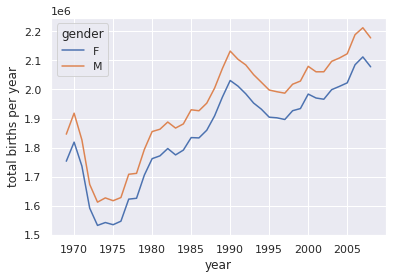

: 

: 

: 

: 

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

### Further data exploration

First, removing outliers could be great. We use sigma-clipping operation

In [ ]:
quartiles = np.percentile(births["births"], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

: 

: 

: 

: 

The final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range if a Gaussian distribution

We use `query` to filter rows outside these values

In [ ]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

: 

: 

: 

: 

Set `day` column as integer

In [ ]:
births['day'] = births['day'].astype(int)

: 

: 

: 

: 

Now we are able to create a date index

In [ ]:
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

: 

: 

: 

: 

Plot it

/tmp/ipykernel_12401/832003187.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


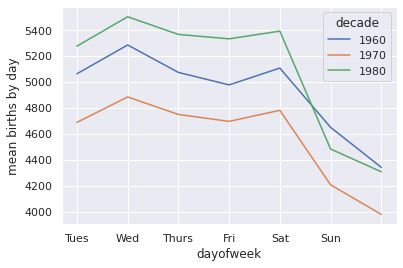

: 

: 

: 

: 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

Now, let's view mean number of births by the day of the year

In [ ]:
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

: 

: 

: 

: 

To be easily plot, we must turn this multi-index into a Date index

In [ ]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

/tmp/ipykernel_12401/4030178730.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


: 

: 

: 

: 

<AxesSubplot:>

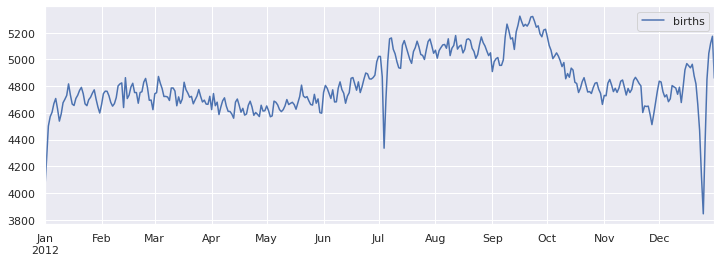

: 

: 

: 

: 

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Vectorized String Operations

A lot of features to manipulate strings

In [ ]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
names = pd.Series(data)
names

0    peter
1     Paul
2     MARY
3    gUIDO
dtype: object

: 

Methods are on `str` attribute

In [ ]:
names.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

: 

### Methods using regular expressions

In [ ]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

: 

In [ ]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

: 

In [ ]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

: 

# Working with Time Series

## Dates and Times in Python

### Native Python dates and times: `datetime` and `dateutil`

In [19]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

We can also use dateutil to do so

In [ ]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

To format, use `strftime`

In [21]:
date.strftime('%A')

'Saturday'

### Typed arrays of times: NumPy's `datetime64`

Allows date to be stored as 64-bits integer

In [23]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [24]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

For more precision (like nanoseconds)

In [25]:
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

### Dates and times in pandas: best of both world

Pandas can create `DateTimeIndex` that can be used to index data in a `Series` or `DataFrame`

In [26]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [27]:
date.strftime('%A')

'Saturday'

In [28]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [29]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

Indexing patterns can be used

In [30]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [31]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

- For timestamps, `Timestamp` and `DatetimeIndex`
- For time perdios, `Period` and `PeriodIndex`
- for time deltas or durations, `Timedelta` and `TimedeltaIndex`

The most fundamentals are `Timestamp` and `DatetimeIndex`. We use `pd.to_datetime()` to obtain one.

In [32]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

Conversion to period is easy 

In [33]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

A `TimedeltaIndex` is created when performing substration (for example)

In [34]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: `pd.date_range()`

- `pd.date_range()` for timestamps
- `pd.period_range()` for periods
- `pd.timedelta_range()` for timedeltas

It accepts a start date, an end date, and an optional frequency (one day by default)

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [36]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Now, we want to create a range with one hour as a frequency 

In [ ]:
pd.date_range('2015-07-03', periods=8, freq="H")

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

Same goes for periods and timedeltas

## Resampling, Shifting and Windowing

In [43]:
!conda install -y pandas-datareader

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /home/tomperr/anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pandas-datareader-0.10.0   |     pyhd3eb1b0_0          71 KB
    ------------------------------------------------------------
                                           Total:          71 KB

The following NEW packages will be INSTALLED:

  pandas-datareader  pkgs/main/noarch::pandas-datareader-0.10.0-pyhd3eb1b0_0 None



pandas-datareader-0. | 71 KB     | ##################################### | 100% 
Preparing transaction: - done
Verifying transaction: | done
Executing transaction: - \ | / - \ | / - \ | / done
Retrieving notices: 

In [56]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,2.591785,2.390042,2.490664,2.499133,897427216.0,2.499133
2004-08-20,2.716817,2.503118,2.515820,2.697639,458857488.0,2.697639
2004-08-23,2.826406,2.716070,2.758411,2.724787,366857939.0,2.724787
2004-08-24,2.779581,2.579581,2.770615,2.611960,306396159.0,2.611960
2004-08-25,2.689918,2.587302,2.614201,2.640104,184645512.0,2.640104


For simplicity, we will only use `Close` attribute

In [57]:
goog = goog['Close']
goog.head()

Date
2004-08-19    2.499133
2004-08-20    2.697639
2004-08-23    2.724787
2004-08-24    2.611960
2004-08-25    2.640104
Name: Close, dtype: float64

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<AxesSubplot:xlabel='Date'>

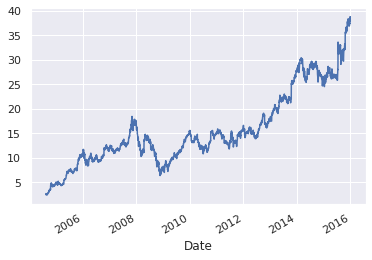

In [52]:
goog.plot()

### Resampling and converting frequencies

Sometimes we want to resample at a higher or lower frequency. This can be done with `resample()` or `asfreq()`

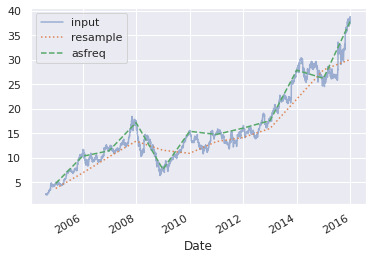

In [59]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left')

The `asfreq` resampling reports the value at the end of the year

For upsampling (in case of missing data for example), we can use different filling methods

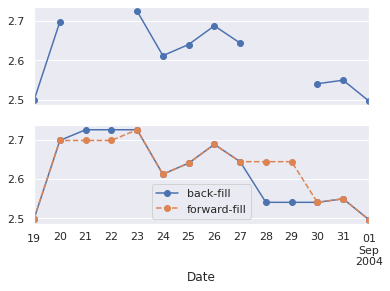

In [63]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"])

### Time-shifts

One main method: `shift()`

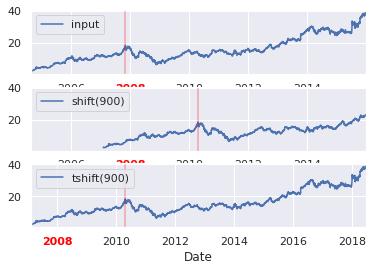

In [69]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])

goog2 = goog.copy()
goog2.index = goog2.index.shift(900)
goog2.plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

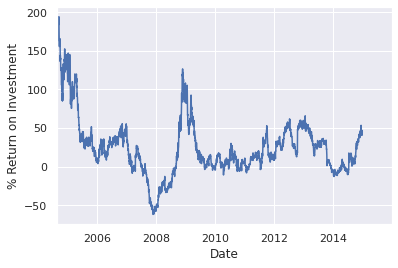

In [73]:
ROI = 100 * (goog.shift(-365, axis="index") / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### Rolling windows

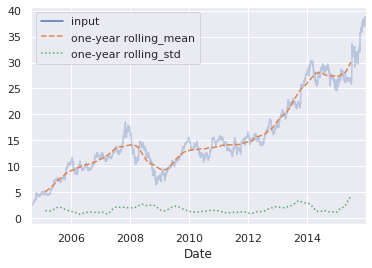

In [74]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

# High-Performance Pandas: `eval()` and `query()`

Pandas includes some experimental tools that allow you to directly access C-speed operations without costly allocation of intermediate arrays.

## Motivating `query()` and `eval()`: Compound Expressions

Consider this condition

In [78]:
rng = np.random.RandomState(42)
x = rng.rand(1000000)
y = rng.rand(1000000)
mask = (x > 0.5) & (y < 0.5)

Because NumPy evaluates each subexpression, this is equivalent to

In [79]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

Every intermediate step is explicitly allocated in memory. The `Numexpr` library gives you the ability to compute this type of compound expression element by element, without the need to allocate full intermediate arrays

In [80]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.allclose(mask, mask_numexpr)

True

The benefit here is that Numexpr evaluates the expression in a way that does not us full-sized temporary arrays.

## `pd.eval()` for Efficient Operations

In [81]:
import pandas as pd
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

To compute the sum of all four `DataFrame`, we can write the sum as 

In [82]:
%timeit df1 + df2 + df3 + df4

132 ms ± 2.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Or with `pd.eval()`

In [83]:
%timeit pd.eval('df1 + df2 + df3 + df4')

51.9 ms ± 995 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Operations supported by `pd.eval()`

All arithmetic operatos

All comparison operators

`&` and `|` bitwise operators

`and` and `or` boolean conditions

`obj.attr` and `obj[index]`

## `DataFrame.eval()` for Column-Wise Operations

Columns can be referred to by name. Let's create a `DataFrame` for examples

In [85]:
df = pd.DataFrame(rng.rand(1000, 3), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.099772,0.365763,0.422644
1,0.941930,0.160890,0.832411
2,0.692094,0.255150,0.668258
3,0.901389,0.718069,0.577554
4,0.944688,0.354645,0.494979


We can comput the sum of columns with `pd.eval()`

In [86]:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

And also with the DataFrame's `eval` method

In [87]:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)


True

### Assignment in `DataFrame.eval()`

The method is allowed to assign to any column

In [88]:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.099772,0.365763,0.422644,1.101482
1,0.941930,0.160890,0.832411,1.324851
2,0.692094,0.255150,0.668258,1.417483
3,0.901389,0.718069,0.577554,2.803996
4,0.944688,0.354645,0.494979,2.625024


### Local variables in `DataFrame.eval()`

In [89]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

The `@` character here marks a variable name rather than a column name

## `DataFrame.query()` Method

Consider

In [92]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

It can't be expressed with `DataFrame.eval()`. For this, we can use the `query` method.

In [93]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

`query` also accepts `@` character

## Performance: When to Use These Functions

Two considerations: computation time and memory use.

If the size of the temporary `DataFrame` (intermediate steps) is siginficant compared to your available system memory (typically several gigabytes), then it's a good idea to use an `eval()` or `query()` expression.